In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [13]:
# Create a synthetic dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + X**2 + np.random.randn(100, 1)
data = pd.DataFrame(np.hstack((X, y)), columns = ['Size', 'Price'])

In [14]:
data.head()

,Size,Price
0,1.097627,7.332516
1,1.430379,11.237946
2,1.205527,9.535537
3,1.089766,6.920646
4,0.847310,8.748115


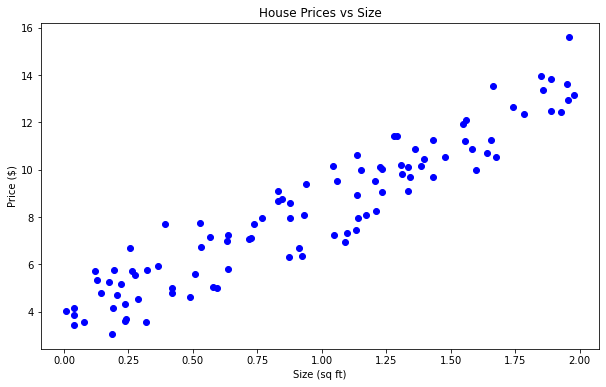

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Size'], data['Price'], color='blue')
plt.title('House Prices vs Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.show()

In [19]:
X = data[['Size']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Polynomial Regression

In [38]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [39]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [40]:
y_pred_poly = poly_reg.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}')

Polynomial Regression MSE: 1.028546780152737


## Ridge Regression

In [43]:
ridge_reg = Ridge(alpha=2)
ridge_reg.fit(X_poly_train, y_train)

Ridge(alpha=2)

In [44]:
y_pred_ridge = ridge_reg.predict(X_poly_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'ridge Regression MSE: {mse_ridge}')

ridge Regression MSE: 1.1129057848323571


## Lasso Regression

In [45]:
lasso_reg = Ridge(alpha=1)
lasso_reg.fit(X_poly_train, y_train)

Ridge(alpha=1)

In [46]:
y_pred_lasso = lasso_reg.predict(X_poly_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')

Lasso Regression MSE: 1.0689734590728837


### Comparing the results

In [47]:
print(f'Polynomial Regression MSE: {mse_poly}')
print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Lasso Regression MSE: {mse_lasso}')

Polynomial Regression MSE: 1.028546780152737
Ridge Regression MSE: 1.1129057848323571
Lasso Regression MSE: 1.0689734590728837


## Interpreting and Visualising the results

In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
size_range = np.linspace(data['Size'].min(), data['Size'].max(), 100).reshape(-1,1)

In [50]:
size_poly_range = poly.transform(size_range)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [51]:
# make predictions with the models
y_pred_poly_full = poly_reg.predict(size_poly_range)
y_pred_ridge_full = ridge_reg.predict(size_poly_range)
y_pred_lasso_full = lasso_reg.predict(size_poly_range)

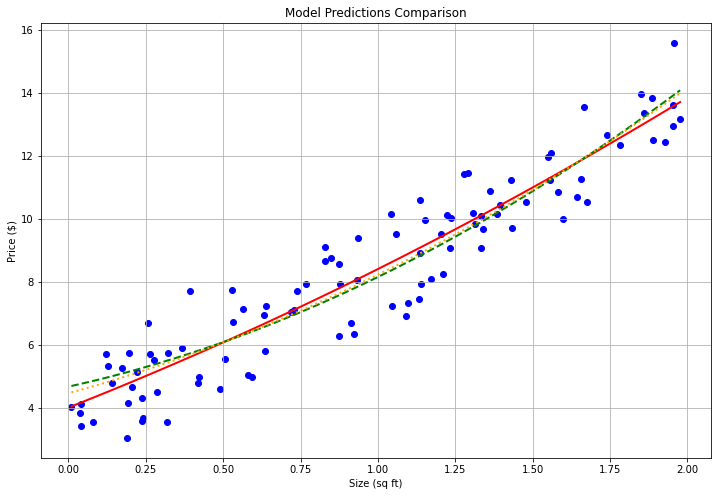

In [53]:
plt.figure(figsize=(12,8))

plt.scatter(data['Size'], data['Price'], color='blue', label='Actual Data')
plt.plot(size_range, y_pred_poly_full, color='red', label='Polynomial Regression', linewidth=2)
plt.plot(size_range, y_pred_ridge_full, color='green', label='Ridge Regression', linewidth=2, linestyle='--')
plt.plot(size_range, y_pred_lasso_full, color='orange', label='Lasso Regression', linewidth=2, linestyle=':')

plt.title('Model Predictions Comparison')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.grid()
plt.show()